In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Lead_df = pd.read_csv('Leads.csv')
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Shape of dataset
Lead_df.shape

(9240, 37)

In [4]:
# Numeric information
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Missing Value imputation

In [6]:
# Many of the columns as Select by default and we can consider it as null

Lead_df.replace('Select', np.nan, inplace=True)

In [7]:
# checking Null values

round(100*Lead_df.isnull().sum()/len(Lead_df.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
Lead_df.loc[:,list(100*(Lead_df.isnull().sum()/len(Lead_df.index))>60)]

,How did you hear about X Education,Lead Profile
0,NaN,NaN
1,NaN,NaN
2,NaN,Potential Lead
3,Word Of Mouth,NaN
4,Other,NaN
...,...,...
9235,NaN,Potential Lead
9236,NaN,Potential Lead
9237,NaN,Potential Lead
9238,Online Search,NaN


In [9]:
# Drop records which has more than 60% data missing
df = Lead_df.drop(Lead_df.loc[:,list(100*(Lead_df.isnull().sum()/len(Lead_df.index))>60)].columns, axis=1)

In [10]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
df.shape

(9240, 35)

In [12]:
# Dropping columns starting with Asymmetrique as they dont add much value
df = df.drop(columns = ['Asymmetrique Activity Index','Asymmetrique Profile Index',
                        'Asymmetrique Activity Score','Asymmetrique Profile Score' ])

In [13]:
df.shape

(9240, 31)

In [14]:
# Lead Quality is useful based on data given. So analyzing the data pattern.
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

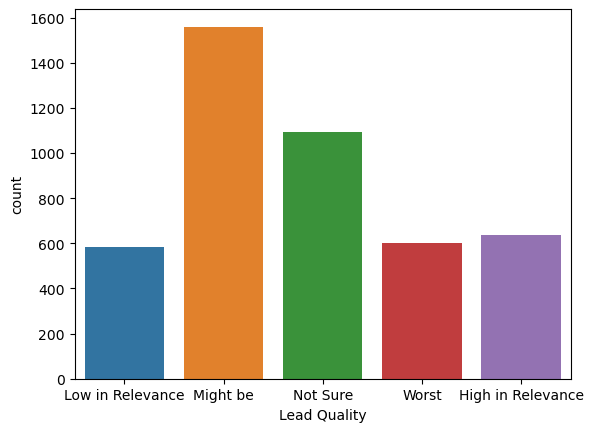

In [15]:
sns.countplot(x = df['Lead Quality'],data = df)
plt.show()

In [16]:
# Here Might be is like, customer is willing to take decision
# Not sure should be considered as Null
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

In [17]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


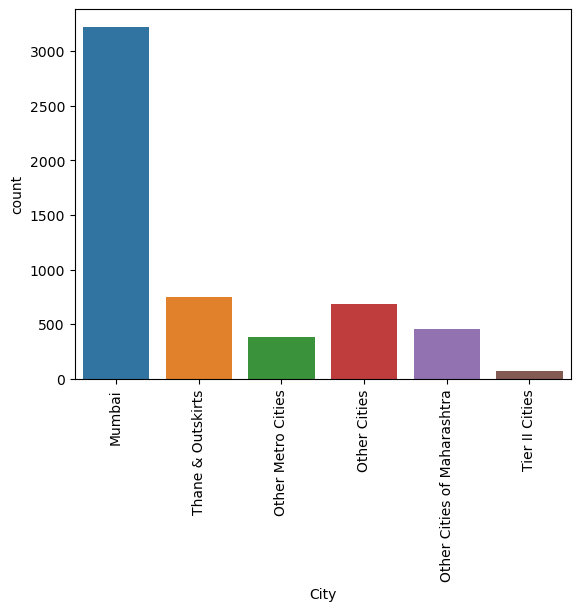

In [18]:
# Now city is having around 40% null values
print(df['City'].value_counts())
sns.countplot(x = df['City'], data = df)
plt.xticks(rotation = 90)
plt.show()

In [19]:
# Here field 'Other Cities' are not clear so replacing them with null values and keeping the rest same
df['City'] = df['City'].replace(np.nan,'Other Cities')
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [20]:
# checking 'Tags' data
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [21]:
# 'Tags' is just information and it has more null values so dropping this field
df = df.drop(columns = ['Tags'])

In [22]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


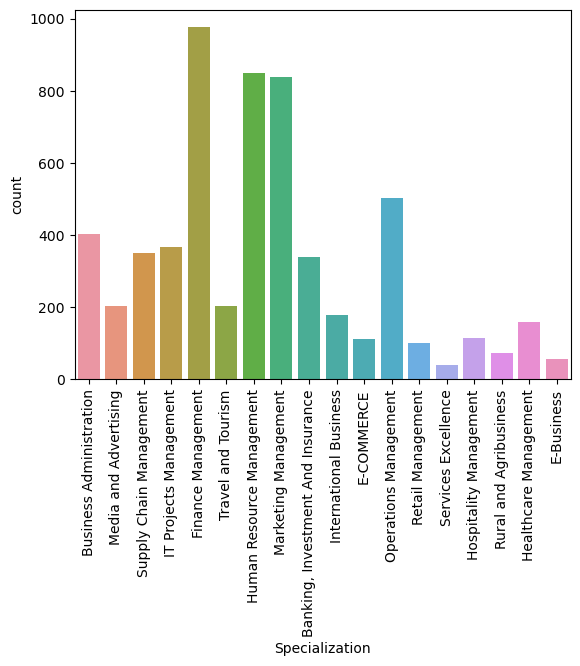

In [23]:
# Checking 'Specialization' field data
print(df['Specialization'].value_counts())
sns.countplot(x = df['Specialization'], data = df)
plt.xticks(rotation = 90)
plt.show()

In [24]:
# Some of customers like students can leave blank in specialization field. So I am replacing all missing values with 'Others'
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


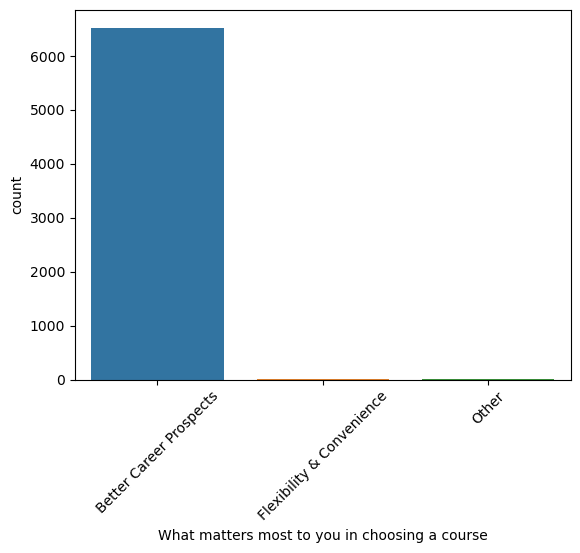

In [25]:
# Check field 'What matters'
print(df['What matters most to you in choosing a course'].value_counts())
sns.countplot(x = df['What matters most to you in choosing a course'],data = df)
plt.xticks(rotation = 45)
plt.show()

In [26]:
df['What matters most to you in choosing a course'].isnull().sum()

2709

In [27]:
# We can replace the missing values with Better Career Prospects which is mode here
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, df['What matters most to you in choosing a course'].mode()[0])
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


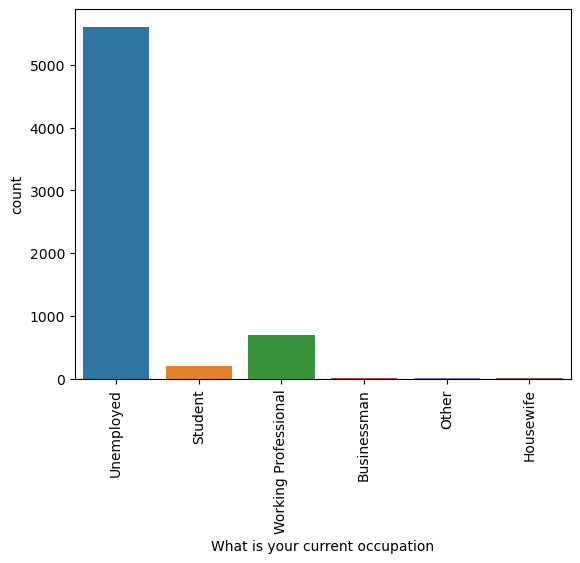

In [28]:
# check for 'Occupation' field
print(df['What is your current occupation'].value_counts())
sns.countplot(x = df['What is your current occupation'],data = df)
plt.xticks(rotation = 90)
plt.show()

In [29]:
# Maximum values are unemployed. Imputing the Null values in Current Occupation with Unemployed
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, df['What is your current occupation'].mode()[0])
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

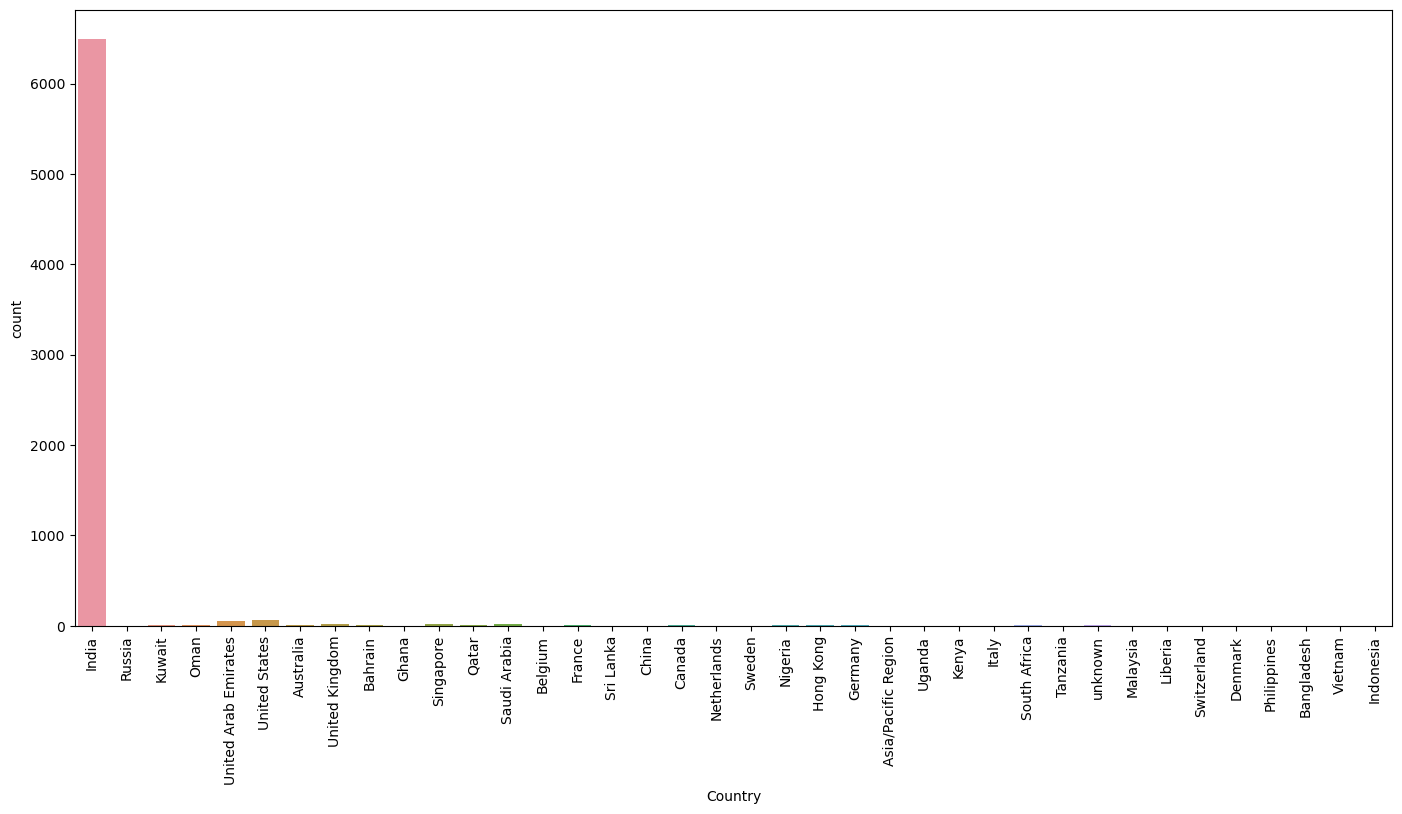

In [30]:
# Check 'Country' field data
plt.figure(figsize=(17,8))
print(df['Country'].value_counts())
sns.countplot(x = df['Country'] ,data = df)
plt.xticks(rotation = 90)
plt.show()

In [31]:
# As 'India' appears highest, we will replace missing values with this which is mode
df['Country'] = df['Country'].replace(np.nan, df['Country'].mode()[0])
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [32]:
# Now we are left with < 2% null values.
df = df.dropna()
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [33]:
df.shape

(9074, 30)

In [34]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Low in Relevance,No,No,Other Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Not Sure,No,No,Other Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Might be,No,No,Mumbai,No,No,Modified


## EDA

In [35]:
# check for duplicates
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [36]:
# check whether data is balanced or not using 'Converted' column
ratio = (sum(df['Converted']/len(df['Converted'].index)*100))
ratio

37.85541106457961

Observations:
1. The percentage of conversion is 37% so this is not a highly imbalced data

In [37]:
df['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [39]:
# Both Lead Number and Prospect ID are unique keys so dropping 'Prospect ID'
df.drop('Prospect ID',axis=1,inplace=True)

## Univariate Analysis

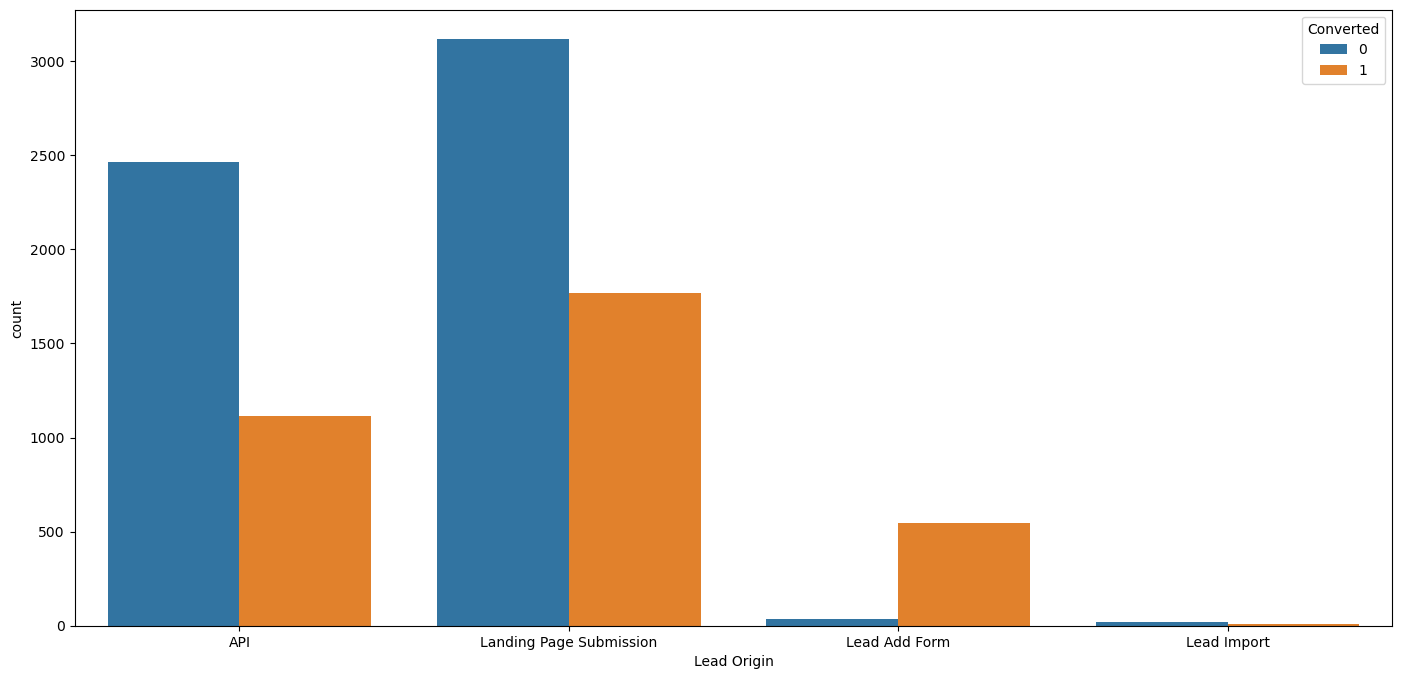

In [40]:
# Lead Origin
plt.figure(figsize = (17,8))
sns.countplot(x='Lead Origin', hue='Converted', data=df)
plt.show()

### Observations:

1. Landing Page Submission has the maximum leads but when considered in percentage terms, the conversions are lower.
2. API has lower Leads but has higher conversion in percentage terms.
3. Lead Add Form has low number of leads.

### Conclusion:

1. Conversion rates of Landing Page Submission needs to be improved.
2. Number of API leads needs to be increased.

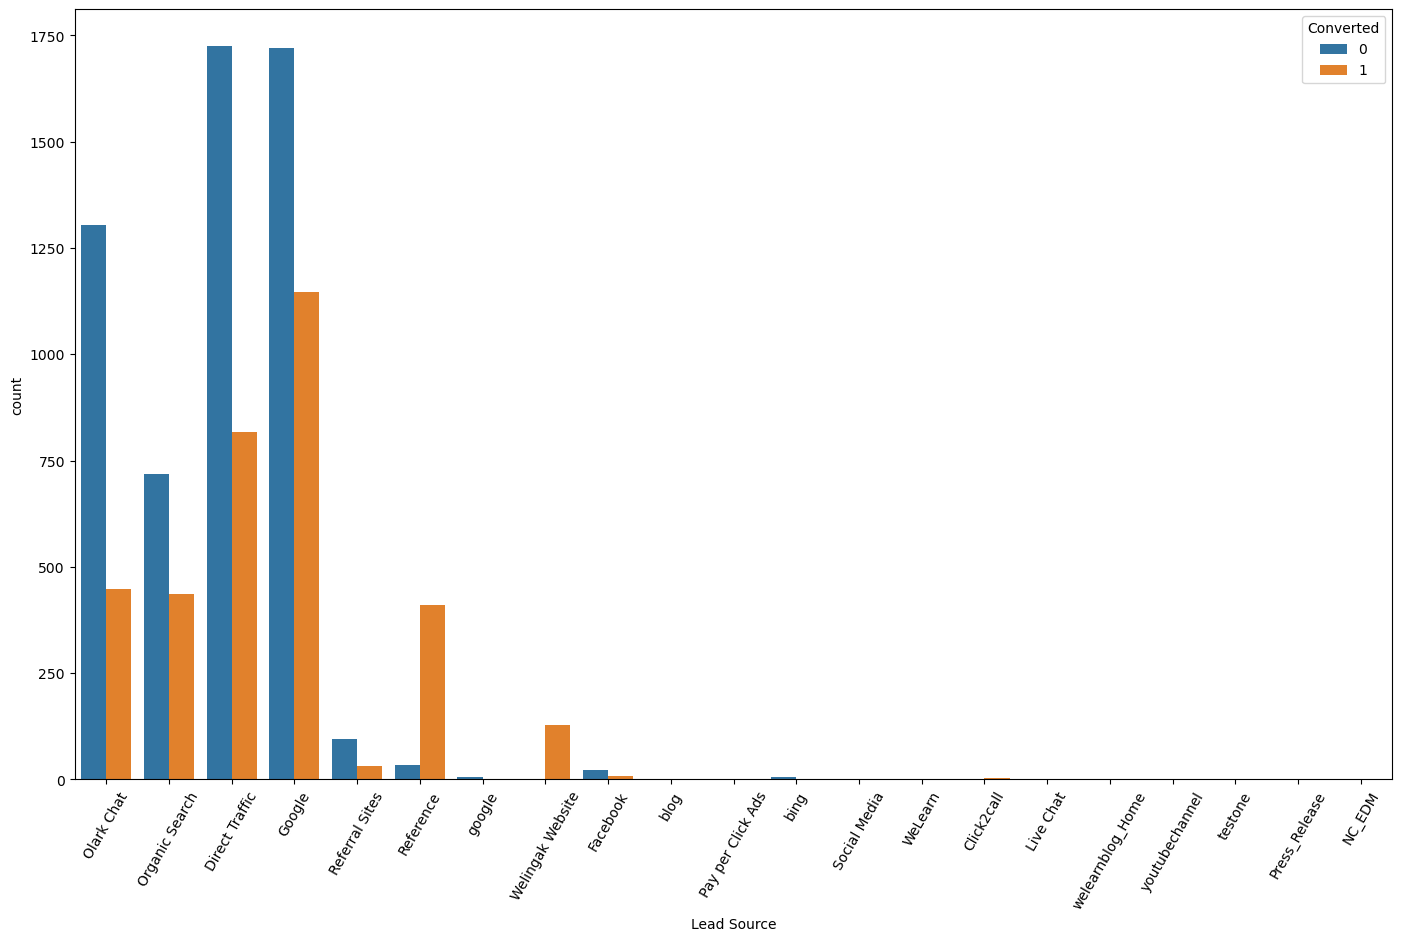

In [41]:
# Analysis on Lead SOurce
plt.figure(figsize = (17,10))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df)
plt.xticks(rotation = 60)
plt.show()

### Observations:

1. There are many categories in Leadsource which have minimal/negligible data. We need to create seperate category as 'other' for it.
2. Also 'google' is in lower case letters so changing it to 'Google' and merging it with existing 'Google' data.

In [42]:
# replacing 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'],'Google')

In [43]:
# Replace the minimal categories with 'Other source'
df['Lead Source'] = df['Lead Source'].replace(['Olark Chat','Referral Sites','Pay per Click Ads','Reference','WeLearn',
                                               'Click2call','blog','welearnblog_Home','youtubechannel','NC_EDM','Live Chat','Welingak Website','testone','Press_Release','Social Media'],'Other_Source')

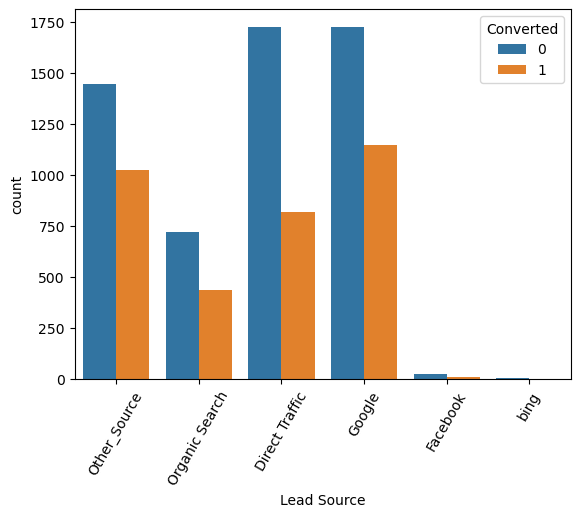

In [44]:
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df)
plt.xticks(rotation = 60)
plt.show()

### Final Observations:

1. Direct Traffic and Google generates maximum number of Leads which are almost equal in number.
2. Conversion rates of all other sources combined is higher.
3. The conversion rates of direct traffic needs improvement.
4. Organic search has low number of leads in terms of count.

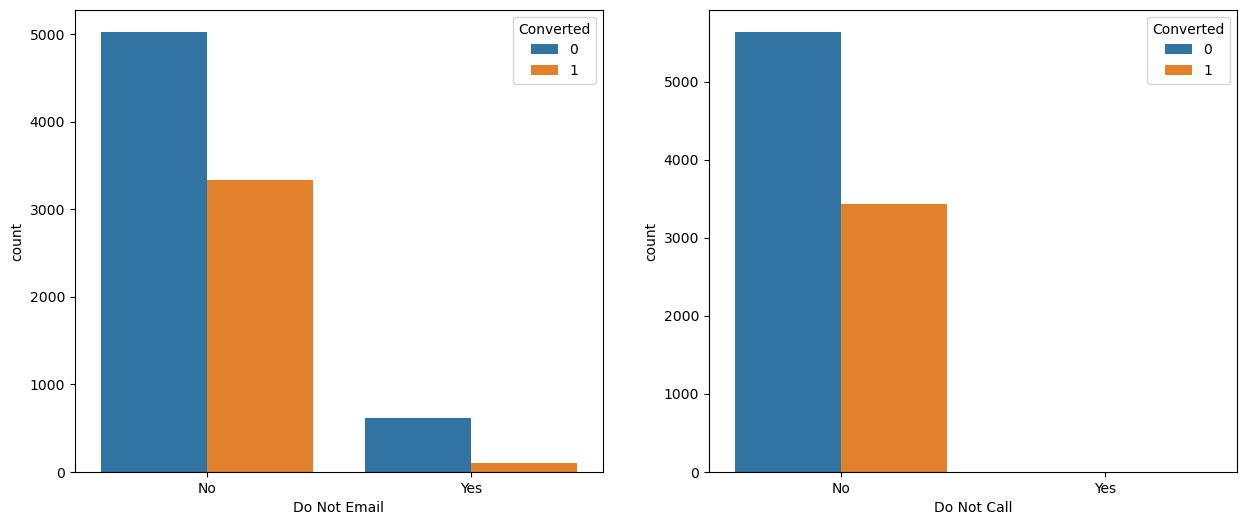

In [45]:
# analyzing cloumns 'do not email'&'do not call'
fig, axs = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = df, ax = axs[0])
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = df, ax = axs[1])
plt.show()

### Observations:

1. People who choose 'Do not Email', will not convert.They do not want to be contacted further.
2. People who choose 'Do not call', There is no lead for them and so conversion also not shown.

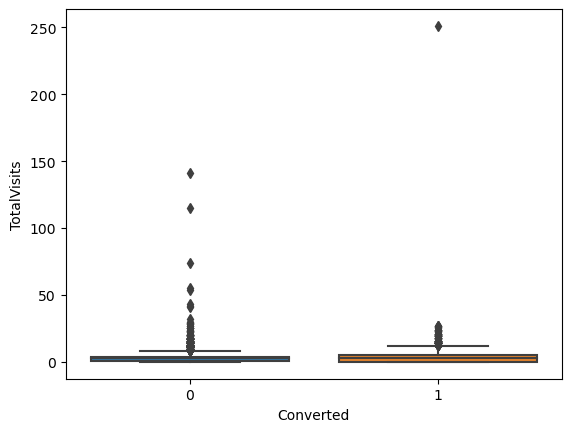

In [46]:
# Analysis on  numeric column 'Total Visits'
sns.boxplot(y='TotalVisits',x='Converted',data=df)
plt.show()

In [47]:
# this is tough to analyze as there are outliers.
# Split the data into percentiles 
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

### Outlier Removal

In [48]:
# up to 95th percentile the visits looks good. After that there is a steep change. 
# So considering data only till 95th percentile and removing outliers.

per_95 = df['TotalVisits'].quantile([0,0.95]).values
df['TotalVisits'][df['TotalVisits'] >= per_95[1]] = per_95[1]

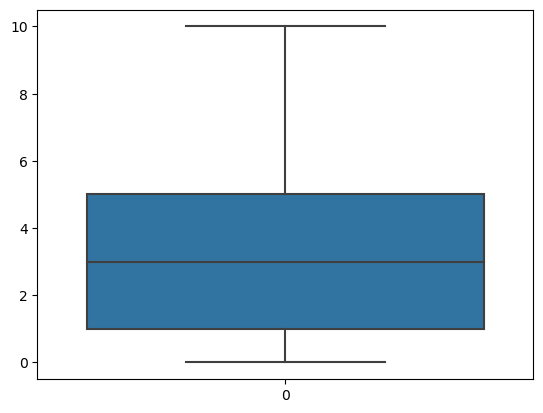

In [49]:
sns.boxplot(df['TotalVisits'])
plt.show()

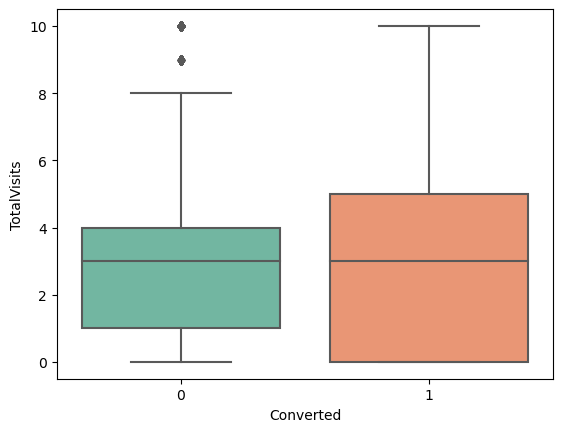

In [50]:
# As all the outliers are removed, checking data based on Convert
sns.boxplot(y='TotalVisits',x='Converted',data=df,palette= 'Set2')
plt.show()

### Observation:

The median is same and we cannot draw much conclusion from this.

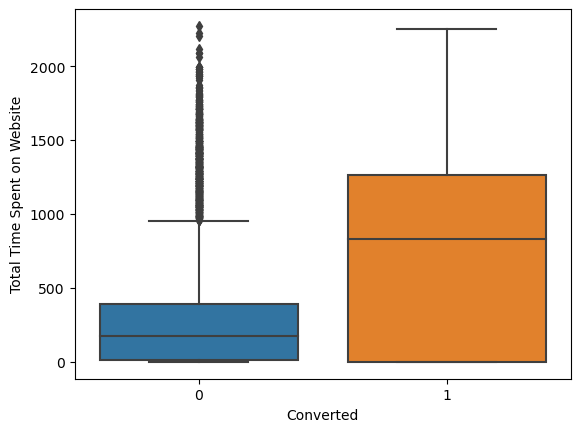

In [51]:
# Analysis on Total Time Spent on Website
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=df)
plt.show()

### Observations:

Leads who spend more time on the website have higher conversion rates.

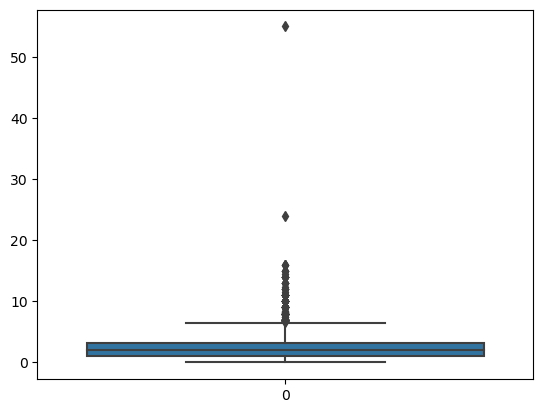

In [52]:
# Analysis on page views per visit

sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [53]:
# Split the data into percentiles 
df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

### Outlier analysis and removal

In [54]:
# Considering data till 95th percentile
per_95 = df['Page Views Per Visit'].quantile([0,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] >= per_95[1]] = per_95[1]

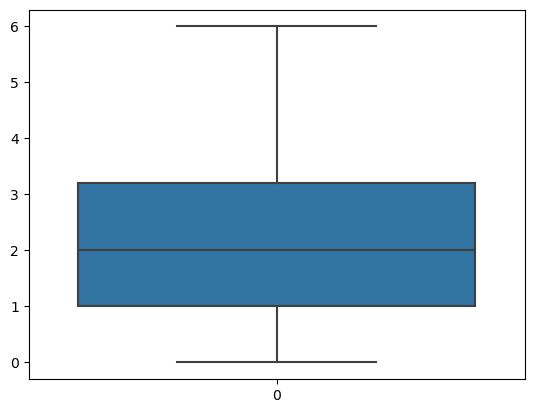

In [55]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

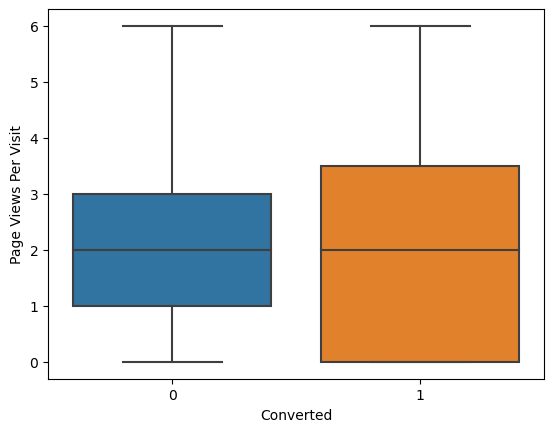

In [56]:
# outliers are removed. Plot the data
sns.boxplot(y='Page Views Per Visit',x='Converted',data=df)
plt.show()

### Observations:

As the median is same so we cannot draw any conclusion.

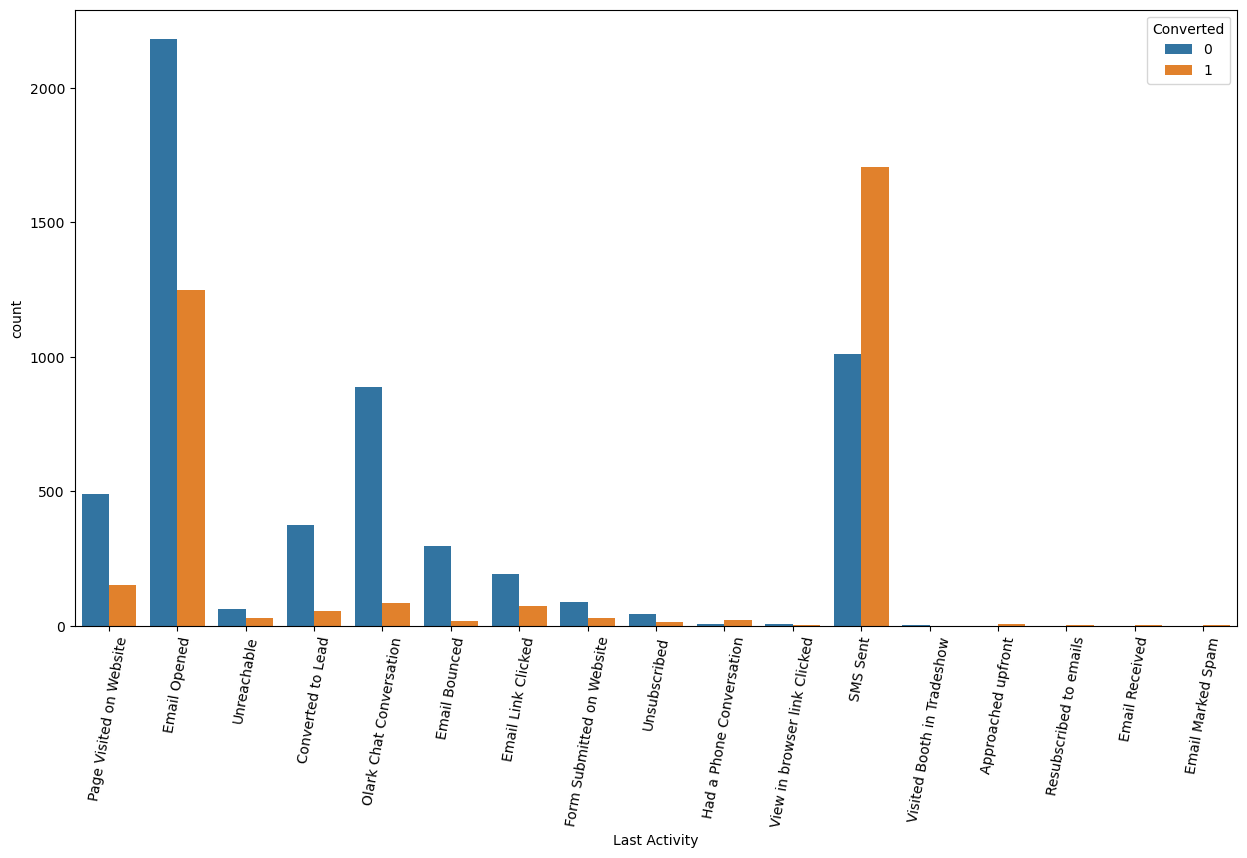

In [57]:
# Analysis on column 'Last Activity'
plt.figure(figsize = (15,8))
sns.countplot(x='Last Activity', hue='Converted', data=df)
plt.xticks(rotation=80)
plt.show()

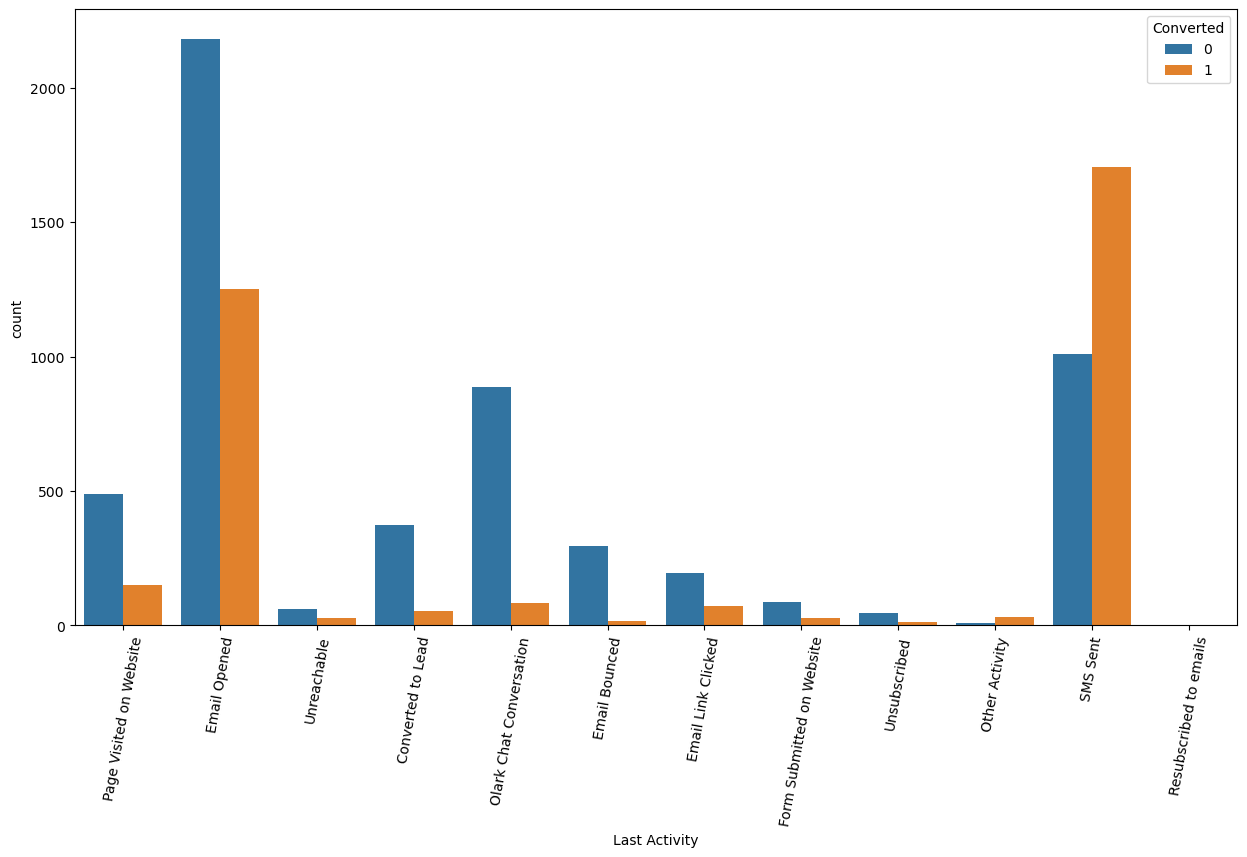

In [58]:
# Group all small data into one category and then plot 
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation','Visited Booth in Tradeshow','Approached upfront',
                                                   'View in browser link Clicked', 'Email Received', 'Email Marked Spam'],'Other Activity')

plt.figure(figsize = (15,8))
sns.countplot(x='Last Activity', hue='Converted', data=df)
plt.xticks(rotation=80)
plt.show()

### Observations:
1. Leads whose Last Activity is SMS Sent has very high chances of Lead Conversion.
2. Email opened has high lead.

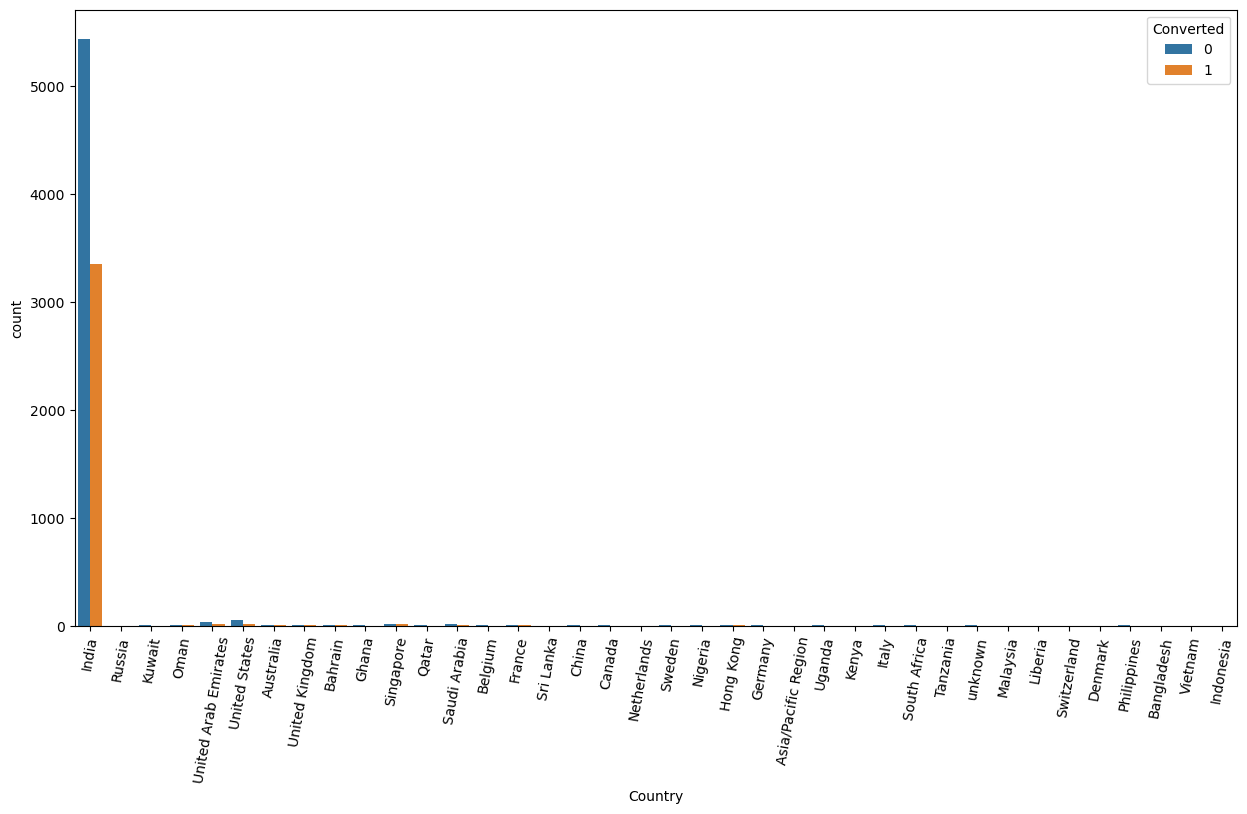

In [59]:
# Analysis on column Country

plt.figure(figsize = (15,8))
sns.countplot(x='Country', hue='Converted', data=df)
plt.xticks(rotation=80)
plt.show()

### Observations:

1. Most of the Leads are from India so we cannot conclude anything from it. 
2. Dropping this column as it is not quite useful for examination.

In [60]:
# Drop column 'Country'
df.drop('Country',axis=1,inplace=True)

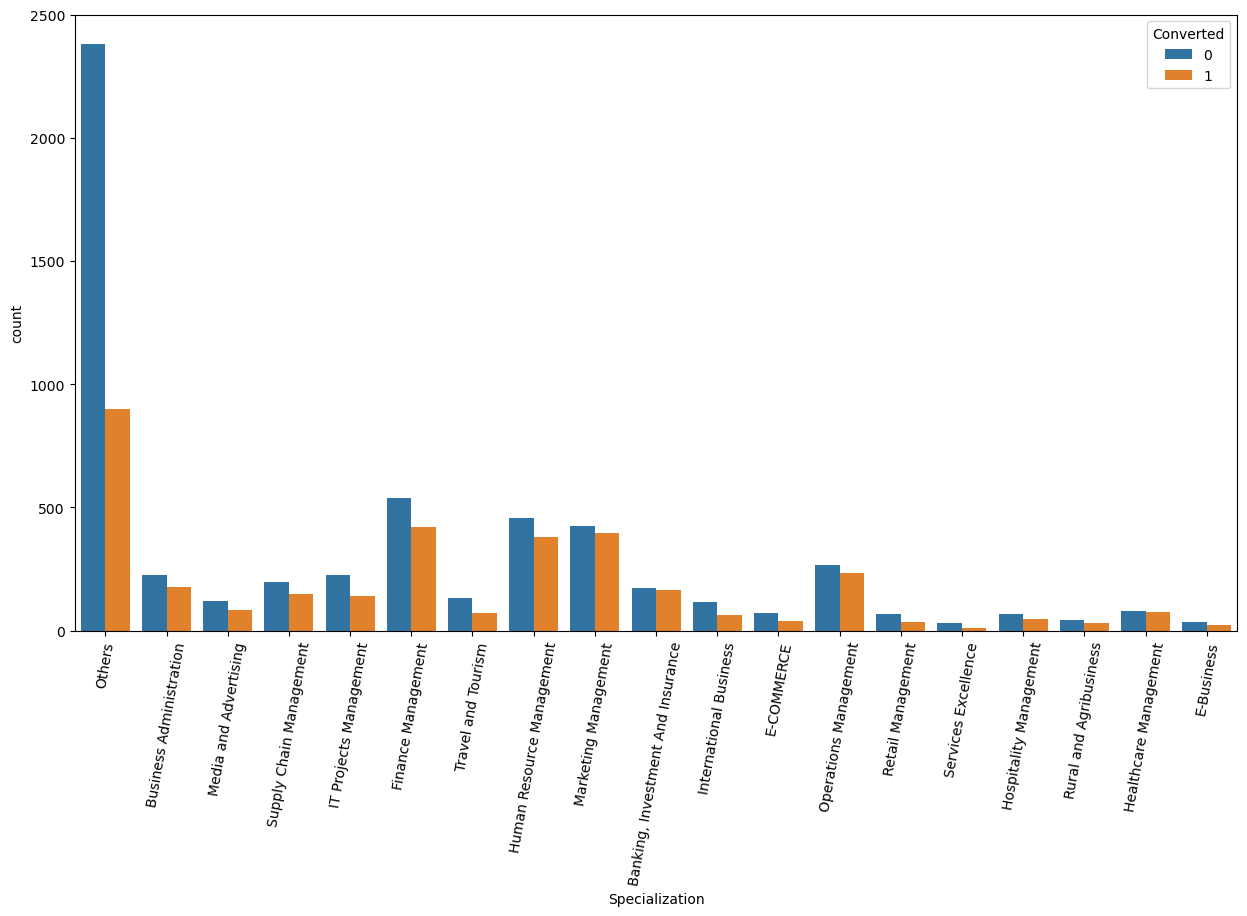

In [61]:
# Analysis on column Specialization
plt.figure(figsize = (15,8))
sns.countplot(x='Specialization', hue='Converted', data=df)
plt.xticks(rotation = 80)
plt.show()

### Observations:
    
Marketing management, Banking, Health care has high conversion rates.

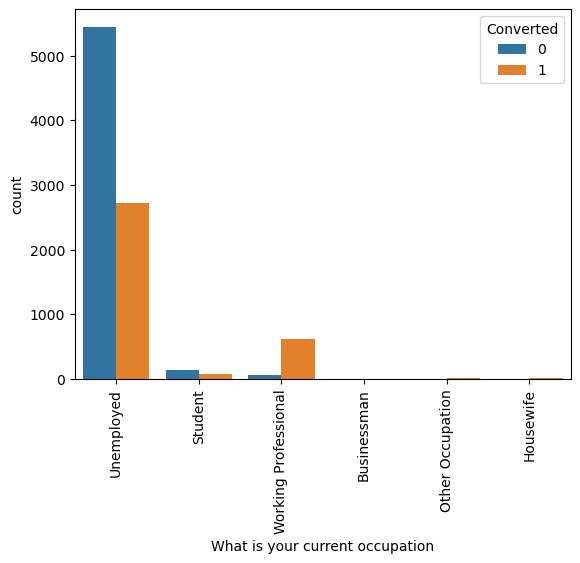

In [62]:
# Analysis on column 'Current Occupation'

df['What is your current occupation'].replace('Other','Other Occupation',inplace=True)
sns.countplot(x='What is your current occupation', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

### Observations:
1. Unemployed leads are the highest number but conversion rate is low.
2. Working professionals have a higher conversion rate.

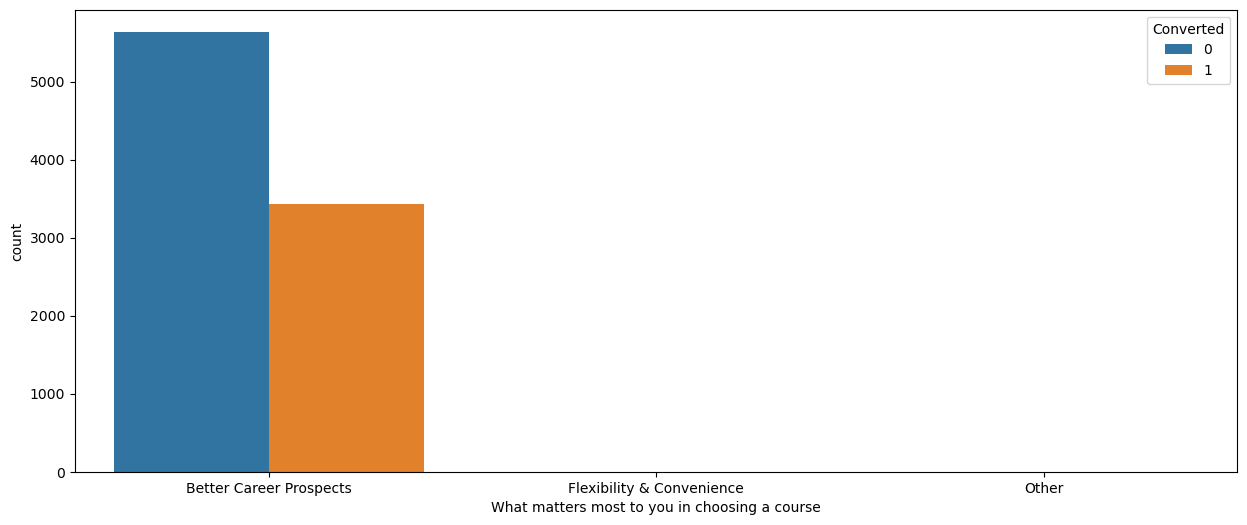

In [63]:
# Analysis on column 'What maters most to you in choosing a course'
plt.figure(figsize = (15,6))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=df)
plt.show()

### Observations:

1. Most responses are for 'Better Career Prospects' so this column is of not much help.
2. Dropping this column as it not useful.

In [64]:
# drop column
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

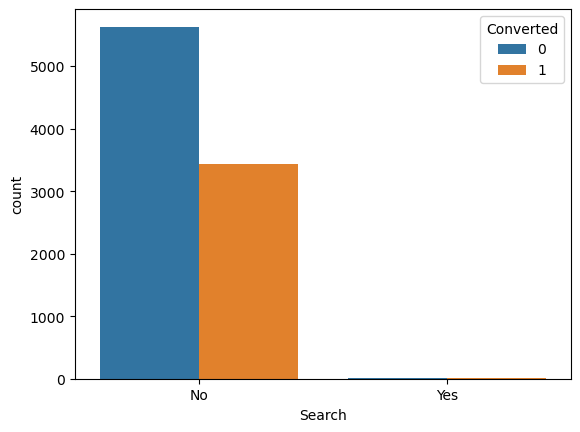

In [65]:
# Analyzing column 'search'
sns.countplot(x='Search', hue='Converted', data=df)
plt.show()

### Observations

1. Most of data contains 'No' as response so this column is of not much help.
2. Dropping this column as it not useful.


In [66]:
# Drop column
df.drop('Search',axis=1,inplace=True)

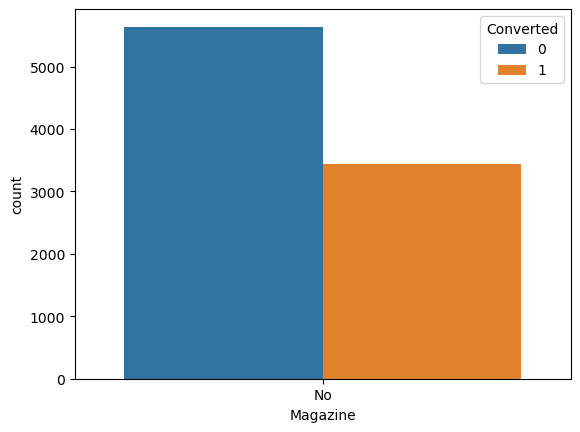

In [67]:
# Analyzing column 'Magazine'
sns.countplot(x='Magazine', hue='Converted', data=df)
plt.show()

In [68]:
# Drop column as we cannot draw any conclusion from 'Magazine'
df.drop('Magazine',axis=1,inplace=True)

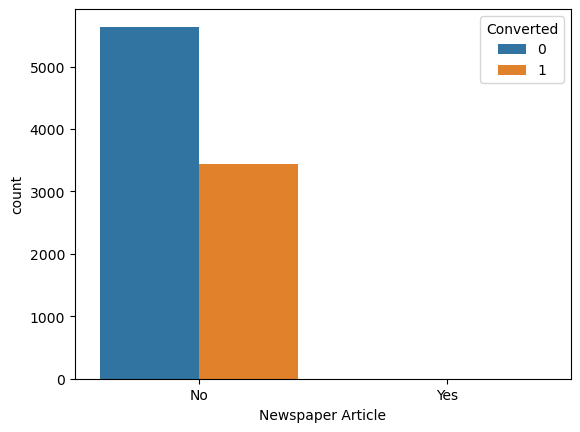

In [69]:
# Analyzing the column Newspaper Article 
sns.countplot(x='Newspaper Article', hue='Converted', data=df)
plt.show()

In [70]:
# Drop column as we cannot draw any conclusion from 'Newspaper Article'
df.drop('Newspaper Article',axis=1,inplace=True)

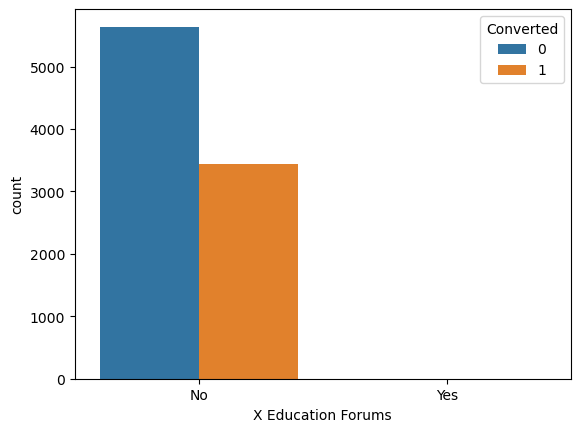

In [71]:
# Analysis on column, X Education Forums
sns.countplot(x='X Education Forums', hue='Converted', data=df)
plt.show()

In [72]:
# Drop column as we cannot draw any conclusion from 'X Education Forums'
df.drop('X Education Forums',axis=1,inplace=True)

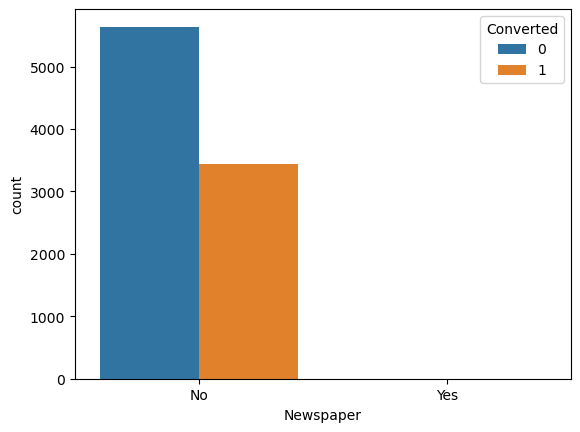

In [73]:
# Analysis on column, Newspaper
sns.countplot(x='Newspaper', hue='Converted', data=df)
plt.show()

In [74]:
# Drop column as we cannot draw any conclusion from 'Newspaper'
df.drop('Newspaper',axis=1,inplace=True)

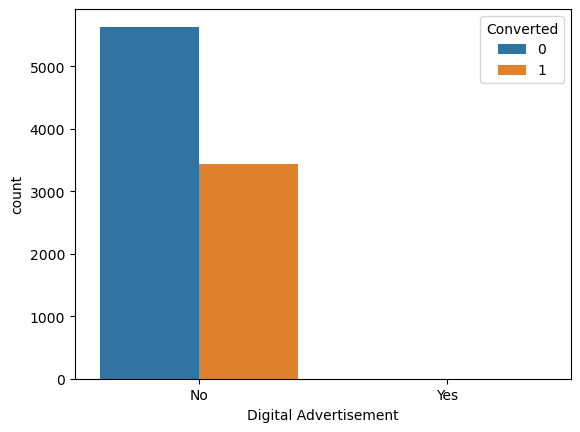

In [75]:
# Analysis on column Digital Advertisement   
sns.countplot(x='Digital Advertisement', hue='Converted', data=df)
plt.show()

In [76]:
# Drop column as we cannot draw any conclusion from 'Digital Advertisement'
df.drop('Digital Advertisement',axis=1,inplace=True)

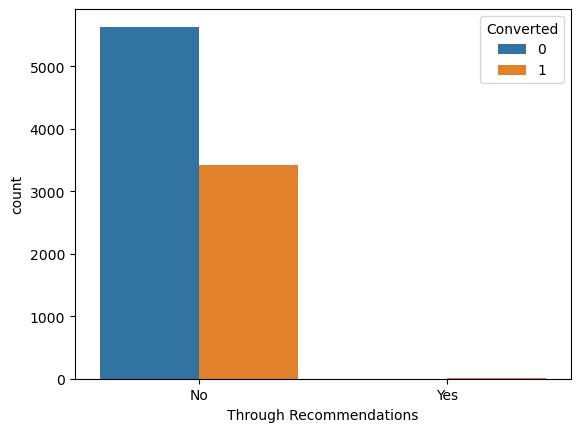

In [77]:
# Analyzing column Through Recommendations   
sns.countplot(x='Through Recommendations', hue='Converted', data=df)
plt.show()

In [78]:
# Drop column as we cannot draw any conclusion from 'Through Recommendations'
df.drop('Through Recommendations',axis=1,inplace=True)

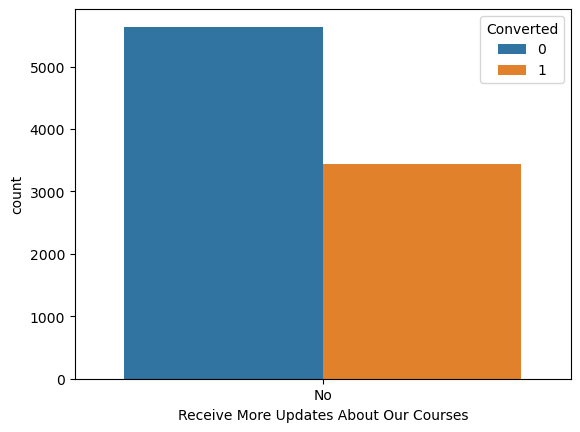

In [79]:
# Analysis on column, Receive More Updates About Our Courses  
sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data=df)
plt.show()

In [80]:
# Drop column
df.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

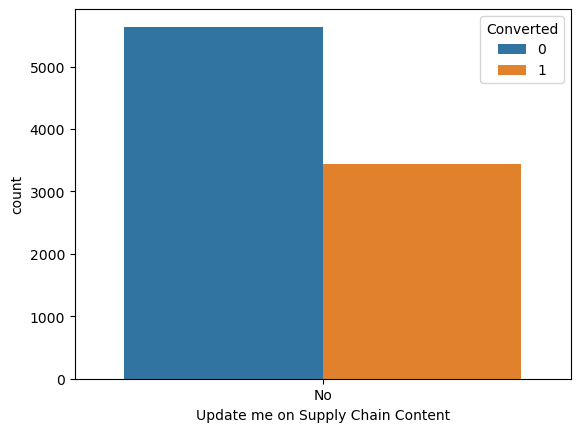

In [81]:
# Analysis on column 'Update me on Supply Chain Content'   
sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data=df)
plt.show()

In [82]:
# Drop column as we cannot draw any conclusion from 'Update me on Supply Chain Content'
df.drop('Update me on Supply Chain Content',axis=1,inplace=True)

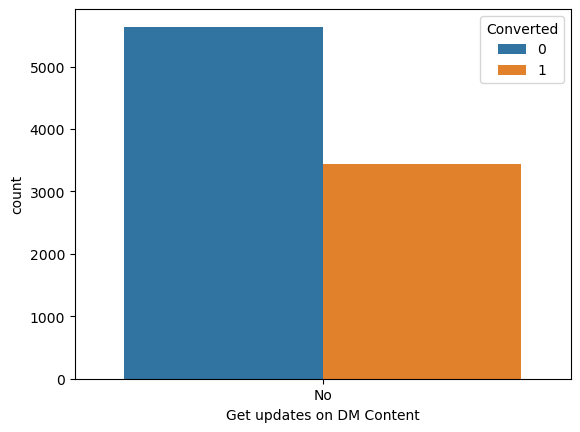

In [83]:
# Analysis column 'Get updates on DM Content'   
sns.countplot(x='Get updates on DM Content', hue='Converted', data=df)
plt.show()

In [84]:
# Drop column as we cannot draw any conclusion from 'Get updates on DM Content'
df.drop('Get updates on DM Content',axis=1,inplace=True)

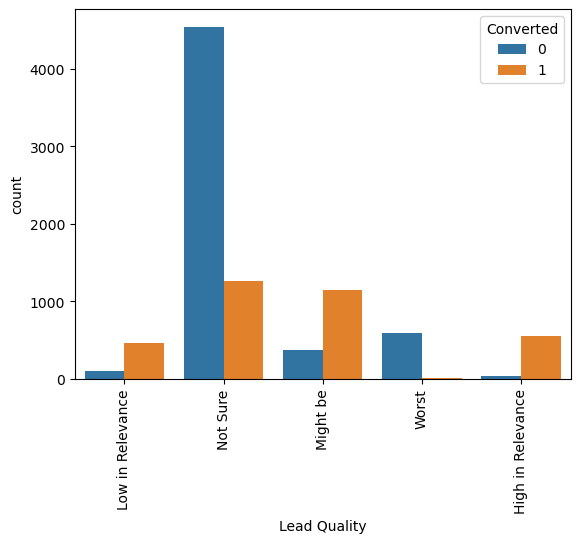

In [85]:
# Analysis on column 'Lead Quality'  
sns.countplot(x='Lead Quality', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

### Observations

1. 'High relevance' and 'Low relevance' has more conversion but it is not quite useful.
2. Dropping thi column.

In [86]:
# Drop column as we cannot draw any conclusion from 'Lead Quality'
df.drop('Lead Quality',axis=1,inplace=True)

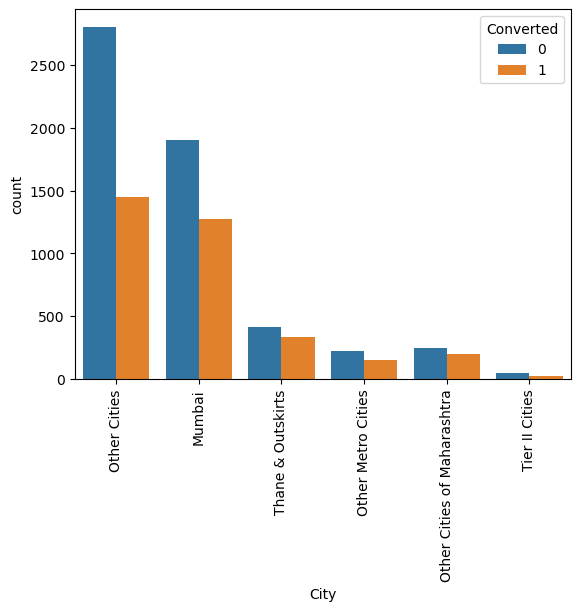

In [87]:
# Analysis on column 'City'  
sns.countplot(x='City', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

### Observations

1. Most of the Leads are from Mumbai
2. 'Other Cities of Maharastra' also has good Conversion rate.


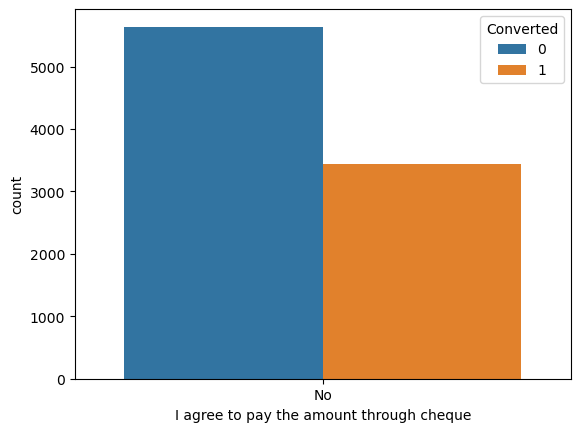

In [88]:
# Analysis on column 'I agree to pay the amount through cheque'  
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data=df)
plt.show()

In [89]:
# Drop column as we cannot draw any conclusion from 'I agree to pay the amount through cheque'
df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

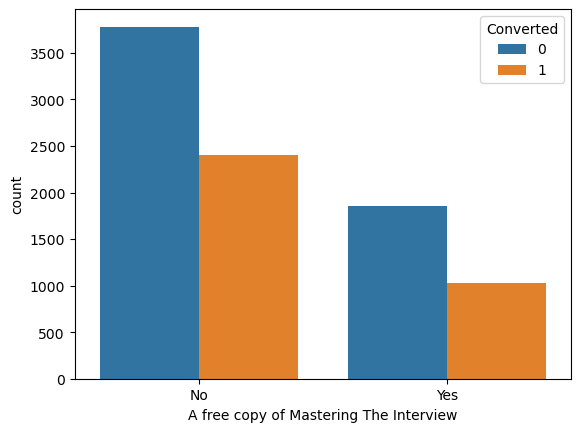

In [90]:
# Analysis on column 'A free copy of Mastering The Interview'  
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=df)
plt.show()

### Observations

1. There is no strong relation between Leads conversion and taking a free copy of a book so not much conclusion.


In [91]:
# Drop column as we cannot draw any conclusion from 'A free copy of Mastering The Interview'
df.drop('A free copy of Mastering The Interview',axis=1,inplace=True)

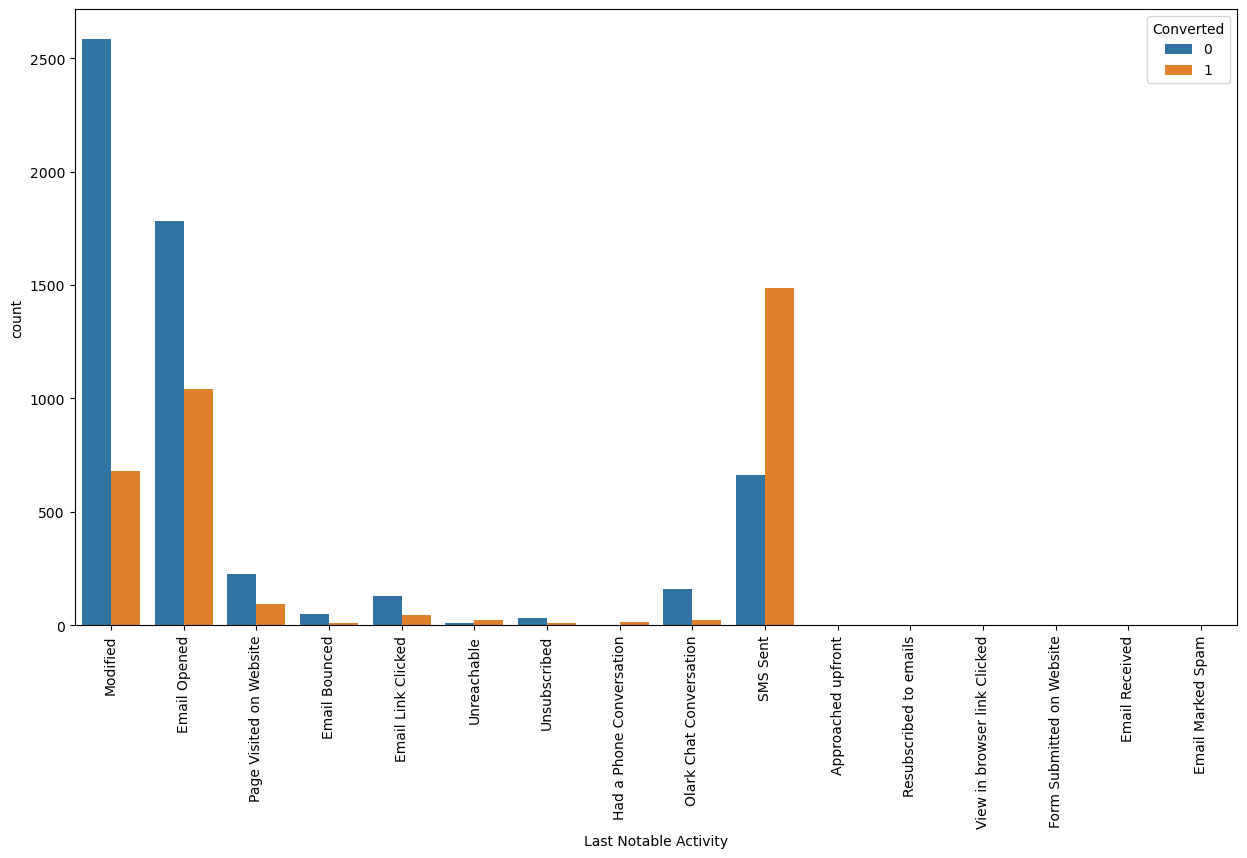

In [92]:
# Checking the final column 'Last Notable Activity' 
plt.figure(figsize = (15,8))
sns.countplot(x='Last Notable Activity', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

### Observations:
1. SMS Sent has high conversion rates.
2. Email opened has moderate conversion.

## Conclusions from EDA

we saw that many attributes were not having any relation with out target column so we have dropped the below columns.

1. Prospect ID
2. Country
3. What matters most to you in choosing a course
4. Search
5. Magazine
6. Newspaper Article
7. X Education Forums
8. Newspaper
9. Digital Advertisement
10. Through Recommendations
11. Receive More Updates About Our Courses
12. Update me on Supply Chain Content
13. Get updates on DM Content
14. Lead Quality
14. I agree to pay the amount through cheque
15. A free copy of Mastering The Interview

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9074 non-null   int64  
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Data Preparation

In [94]:
# Converting the binary values(Yes/No) to 1 and 0 
df['Do Not Email'] = df['Do Not Email'].map(lambda x: 1 if x == 'Yes' else 0)
df['Do Not Call'] = df['Do Not Call'].map(lambda x: 1 if x == 'Yes' else 0)

In [95]:
print(df['Do Not Email'].value_counts())
print('-'*50)
print(df['Do Not Call'].value_counts())

0    8358
1     716
Name: Do Not Email, dtype: int64
--------------------------------------------------
0    9072
1       2
Name: Do Not Call, dtype: int64


In [96]:
# Create dummy variables

dummy_var = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)

In [97]:
# Adding this data to the main dataframe
df = pd.concat([df, dummy_var], axis=1)

In [98]:
# Drop the original columns which are used for creation of Dummy variables
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting data into Train and Test

In [99]:
# Seperate the target variable 'Converted'
X = df.drop(['Lead Number','Converted'], axis=1)
y = df.pop('Converted')

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [102]:
# MinMax scaling
scaler = MinMaxScaler()    
cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.0,0.0,0.2,0.178347,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,1.0,0.0,0.2,0.085355,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9226,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4750,0.0,0.0,0.2,0.619946,0.333333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7987,0.0,0.0,0.5,0.711590,0.416667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


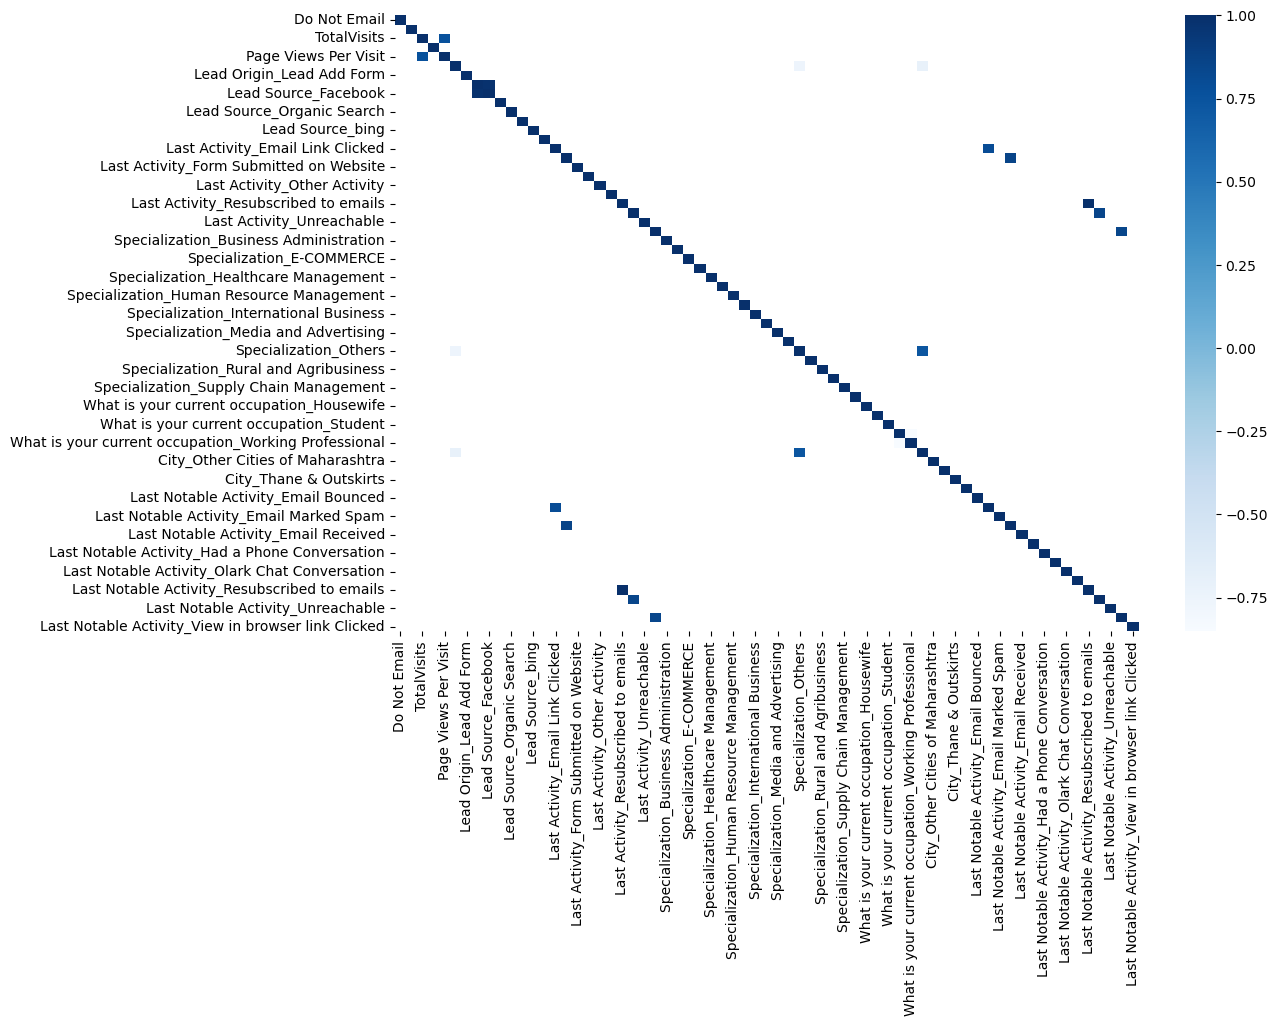

In [103]:
# Checking for Correlations
# We are checking on correlation only in the range of >= (+/- 0.7)
corr = X_train.corr()
corr1 = corr[abs(corr)>= 0.7]
plt.figure(figsize=(12,8))
sns.heatmap(corr1,cmap='Blues')
plt.show()


In [104]:
# Print the columns which has correlation above +/- 0.7
corr_list =  corr.where(~np.tril(np.ones(corr.shape)).astype(bool)) 
corr_res = corr_list.stack()
print(corr_res[(abs(corr_res) > 0.7)])

TotalVisits                                 Page Views Per Visit                                    0.766735
Lead Origin_Landing Page Submission         Specialization_Others                                  -0.753135
                                            City_Other Cities                                      -0.708444
Lead Origin_Lead Import                     Lead Source_Facebook                                    0.979718
Last Activity_Email Link Clicked            Last Notable Activity_Email Link Clicked                0.804444
Last Activity_Email Opened                  Last Notable Activity_Email Opened                      0.858361
Last Activity_Resubscribed to emails        Last Notable Activity_Resubscribed to emails            1.000000
Last Activity_SMS Sent                      Last Notable Activity_SMS Sent                          0.851814
Last Activity_Unsubscribed                  Last Notable Activity_Unsubscribed                      0.846581
Specialization_Othe

## Observations

1. Last Activity* has strong correlation with Last Notable activity*.
2. Lead Origin has correaltion with Lead Source_Facebook
3. Occupation of Unempolyed has strong negative correlation with Working Professional.
4. We are dropping the above two correlations to build better model

In [105]:
X_train.drop(['Page Views Per Visit',
              'Specialization_Others',
              'Lead Source_Facebook',
              'Last Notable Activity_Email Link Clicked',
              'Last Notable Activity_Email Opened',
              'Last Notable Activity_Resubscribed to emails',
              'Last Notable Activity_Unsubscribed',
              'Last Notable Activity_SMS Sent',
              'What is your current occupation_Unemployed',
              'City_Other Cities'],
               axis=1,inplace=True)
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other_Source,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
3009,0.0,0.0,0.2,0.178347,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,1.0,0.0,0.2,0.085355,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9226,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4750,0.0,0.0,0.2,0.619946,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7987,0.0,0.0,0.5,0.711590,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [106]:
X_train.shape

(6351, 57)

## Model Building

In [107]:
# First model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.7
Date:                Sun, 15 Oct 2023   Deviance:                       5203.4
Time:                        08:51:01   Pearson chi2:                 6.70e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9266      0.263    -11.123      0.000      -3.442      -2.411
Do Not Email                                            -1.5499      0.218     -7.109      0.000      -1.977      -1.123
Do Not Call                                             21.6871   3.37e+04      0.001      0.999    -6.6e+04     6.6e+04
TotalVisits                                              0.4112      0.165      2.490      0.013       0.088       0.735
Total Time Spent on Website                              4.4757      0.167     26.864      0.000       4.149       4.802
Lead Origin_Landing Page Submission                     -0.7226      0.125     -5.801      0.000      -0.967      -0.478
Lead Origin_Lead Add Form                                2.9344      0.220     13.316      0.000       2.502       3.366
Lead Origin_Lead Import                                  1.2648      0.482      2.623      0.009       0.320       2.210
Lead Source_Google                                       0.2640      0.096      2.762      0.006       0.077       0.451
Lead Source_Organic Search                               0.0369      0.129      0.287      0.774      -0.215       0.289
Lead Source_Other_Source                                 1.2349      0.149      8.297      0.000       0.943       1.527
Lead Source_bing                                         0.9126      1.328      0.687      0.492      -1.690       3.515
Last Activity_Email Bounced                             -0.1911      0.666     -0.287      0.774      -1.497       1.115
Last Activity_Email Link Clicked                         0.2252      0.310      0.726      0.468      -0.383       0.833
Last Activity_Email Opened                               0.5222      0.240      2.179      0.029       0.052       0.992
Last Activity_Form Submitted on Website                  0.4757      0.400      1.188      0.235      -0.309       1.261
Last Activity_Olark Chat Conversation                   -0.3742      0.285     -1.312      0.189      -0.933       0.185
Last Activity_Other Activity                             2.2185      0.630      3.523      0.000       0.984       3.453
Last Activity_Page Visited on Website                    0.5455      0.298      1.828      0.068      -0.039       1.130
Last Activity_Resubscribed to emails                    24.2577   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.8209      0.239      7.630      0.000       1.353       2.289
Last Activity_Unreachable                                0.4690      0.536      0.876      0.381      -0.581       1.519
Last Activity_Unsubscribed                               1

#### As there are many columns , We need to use RFE to select best features.

## Feature Selection using RFE

In [108]:
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select = 15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Other_Source', True, 1),
 ('Lead Source_bing', False, 32),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 43),
 ('Last Activity_Email Opened', False, 26),
 ('Last Activity_Form Submitted on Website', False, 24),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_Resubscribed to emails', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 22),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Business Administration', False, 21),
 ('Spe

In [109]:
#Columns within top 15
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Other_Source', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other Occupation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


### Model 2

In [110]:
# Building the Model2 after filtering using RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.1
Date:                Sun, 15 Oct 2023   Deviance:                       5316.2
Time:                        08:51:02   Pearson chi2:                 6.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2035      0.077    -28.706      0.000      -2.354      -2.053
Do Not Email                                            -1.6600      0.185     -8.996      0.000      -2.022      -1.298
Total Time Spent on Website                              4.5451      0.163     27.860      0.000       4.225       4.865
Lead Origin_Lead Add Form                                3.1344      0.217     14.460      0.000       2.710       3.559
Lead Origin_Lead Import                                  1.4575      0.458      3.180      0.001       0.559       2.356
Lead Source_Other_Source                                 1.1283      0.100     11.237      0.000       0.932       1.325
Last Activity_Olark Chat Conversation                   -0.9193      0.167     -5.514      0.000      -1.246      -0.593
Last Activity_Other Activity                             1.7667      0.560      3.154      0.002       0.669       2.865
Last Activity_SMS Sent                                   1.3094      0.074     17.584      0.000       1.163       1.455
Last Activity_Unsubscribed                               1.3187      0.481      2.744      0.006       0.377       2.261
What is your current occupation_Housewife               22.7695   1.56e+04      0.001      0.999   -3.05e+04    3.06e+04
What is your current occupation_Other Occupation         1.3455      0.732      1.838      0.066      -0.089       2.780
What is your current occupation_Working Professional     2.7333      0.189     14.483      0.000       2.363       3.103
Last Notable Activity_Had a Phone Conversation           1.6649      1.229      1.355      0.175      -0.743       4.073
Last Notable Activity_Modified                          -0.8919      0.080    -11.121      0.000      -1.049      -0.735
Last Notable Activity_Unreachable                        1.5785      0.474      3.332      0.001       0.650       2.507
========================================================================================================================
"""

In [111]:
# 'What is your current occupation_Housewife' column has a high P-Value of 0.999 so dropping it. 
col = col.drop('What is your current occupation_Housewife',1)
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Other_Source', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Other Occupation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


### Model 3

In [112]:
# Building the Model 3 
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.5
Date:                Sun, 15 Oct 2023   Deviance:                       5325.1
Time:                        08:51:03   Pearson chi2:                 6.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3902
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1965      0.077    -28.668      0.000      -2.347      -2.046
Do Not Email                                            -1.6626      0.185     -9.008      0.000      -2.024      -1.301
Total Time Spent on Website                              4.5435      0.163     27.881      0.000       4.224       4.863
Lead Origin_Lead Add Form                                3.1522      0.217     14.554      0.000       2.728       3.577
Lead Origin_Lead Import                                  1.4524      0.458      3.169      0.002       0.554       2.351
Lead Source_Other_Source                                 1.1243      0.100     11.205      0.000       0.928       1.321
Last Activity_Olark Chat Conversation                   -0.9211      0.167     -5.525      0.000      -1.248      -0.594
Last Activity_Other Activity                             1.7637      0.560      3.148      0.002       0.666       2.862
Last Activity_SMS Sent                                   1.3040      0.074     17.522      0.000       1.158       1.450
Last Activity_Unsubscribed                               1.3164      0.481      2.739      0.006       0.375       2.258
What is your current occupation_Other Occupation         1.3425      0.732      1.834      0.067      -0.092       2.778
What is your current occupation_Working Professional     2.7295      0.189     14.463      0.000       2.360       3.099
Last Notable Activity_Had a Phone Conversation           1.6610      1.229      1.352      0.176      -0.747       4.069
Last Notable Activity_Modified                          -0.8952      0.080    -11.168      0.000      -1.052      -0.738
Last Notable Activity_Unreachable                        1.5724      0.474      3.320      0.001       0.644       2.501
========================================================================================================================
"""

In [113]:
# 'Last Notable Activity_Had a Phone Conversation' column has a high P-Value of 0.176 so dropping it. 
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Other_Source', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Other Occupation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


### Model 4

In [114]:
# Building the Model 4 
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.6
Date:                Sun, 15 Oct 2023   Deviance:                       5327.3
Time:                        08:51:03   Pearson chi2:                 6.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1923      0.077    -28.653      0.000      -2.342      -2.042
Do Not Email                                            -1.6657      0.185     -9.011      0.000      -2.028      -1.303
Total Time Spent on Website                              4.5395      0.163     27.863      0.000       4.220       4.859
Lead Origin_Lead Add Form                                3.1544      0.217     14.560      0.000       2.730       3.579
Lead Origin_Lead Import                                  1.4502      0.458      3.164      0.002       0.552       2.348
Lead Source_Other_Source                                 1.1197      0.100     11.166      0.000       0.923       1.316
Last Activity_Olark Chat Conversation                   -0.9162      0.167     -5.496      0.000      -1.243      -0.590
Last Activity_Other Activity                             2.2236      0.469      4.745      0.000       1.305       3.142
Last Activity_SMS Sent                                   1.3033      0.074     17.514      0.000       1.157       1.449
Last Activity_Unsubscribed                               1.3188      0.481      2.744      0.006       0.377       2.261
What is your current occupation_Other Occupation         1.3450      0.732      1.837      0.066      -0.090       2.780
What is your current occupation_Working Professional     2.7275      0.189     14.448      0.000       2.357       3.097
Last Notable Activity_Modified                          -0.9028      0.080    -11.280      0.000      -1.060      -0.746
Last Notable Activity_Unreachable                        1.5697      0.474      3.315      0.001       0.642       2.498
========================================================================================================================
"""

In [115]:
# 'What is your current occupation_Other Occupation' column has a high P-Value of 0.066 so dropping it. 
col = col.drop('What is your current occupation_Other Occupation',1)
print(col)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Other_Source', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')


### Model 5

In [116]:
# Building the Model 5 
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.4
Date:                Sun, 15 Oct 2023   Deviance:                       5330.8
Time:                        08:51:03   Pearson chi2:                 6.60e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3896
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1911      0.076    -28.651      0.000      -2.341      -2.041
Do Not Email                                            -1.6586      0.185     -8.986      0.000      -2.020      -1.297
Total Time Spent on Website                              4.5477      0.163     27.913      0.000       4.228       4.867
Lead Origin_Lead Add Form                                3.1522      0.217     14.554      0.000       2.728       3.577
Lead Origin_Lead Import                                  1.4491      0.458      3.162      0.002       0.551       2.347
Lead Source_Other_Source                                 1.1199      0.100     11.170      0.000       0.923       1.316
Last Activity_Olark Chat Conversation                   -0.9158      0.167     -5.495      0.000      -1.242      -0.589
Last Activity_Other Activity                             2.2187      0.469      4.734      0.000       1.300       3.137
Last Activity_SMS Sent                                   1.3000      0.074     17.481      0.000       1.154       1.446
Last Activity_Unsubscribed                               1.3081      0.481      2.722      0.006       0.366       2.250
What is your current occupation_Working Professional     2.7238      0.189     14.433      0.000       2.354       3.094
Last Notable Activity_Modified                          -0.8993      0.080    -11.248      0.000      -1.056      -0.743
Last Notable Activity_Unreachable                        1.5671      0.474      3.309      0.001       0.639       2.495
========================================================================================================================
"""

In [117]:
# All the P-Values are below 0.05 so stopping P-value check here.
# Now, we check the VIF to chck the correlation amoung the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Lead Source_Other_Source,1.89
5,Last Activity_Olark Chat Conversation,1.53
10,Last Notable Activity_Modified,1.53
2,Lead Origin_Lead Add Form,1.52
1,Total Time Spent on Website,1.46
7,Last Activity_SMS Sent,1.44
0,Do Not Email,1.17
9,What is your current occupation_Working Profes...,1.16
8,Last Activity_Unsubscribed,1.08
6,Last Activity_Other Activity,1.01


In [118]:
# The VIF value is < 2 for all so the model is good.
X_train_sm.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Other_Source,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3009,1.0,0.0,0.178347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,1.0,1.0,0.085355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9226,1.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4750,1.0,0.0,0.619946,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7987,1.0,0.0,0.711590,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [119]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.200996
1012    0.323496
9226    0.338381
4750    0.873042
7987    0.809324
1281    0.753823
2880    0.101290
4971    0.901875
7536    0.864112
1248    0.780380
dtype: float64

In [120]:
# COnverting to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20099645, 0.32349615, 0.33838145, 0.87304207, 0.80932386,
       0.75382344, 0.10129043, 0.90187473, 0.86411163, 0.78038027])

In [121]:
#Creating a Dataframe with the actual lead conversion vs predicted lead conversion
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.200996,3009
1,0,0.323496,1012
2,0,0.338381,9226
3,1,0.873042,4750
4,1,0.809324,7987


In [122]:
# Consider 0.5 as arbitary value for initial model analysis
# column Predicted, with less than/equal 0.5 Converted probability as 0 and higher than 0.5 as 1.

y_train_pred_final['Predicted'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted
0,0,0.200996,3009,0
1,0,0.323496,1012,0
2,0,0.338381,9226,0
3,1,0.873042,4750,1
4,1,0.809324,7987,1


## Model Evaluation

In [123]:
#Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'] )
print(confusion)

[[3474  431]
 [ 741 1705]]


In [124]:
# Predicted     not_churn    churn
# Actual
# not_churn        3474      431
# churn            741       1705  

In [125]:
# The overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.8154621319477248


## Metrics Beyond Accuracy

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('*******TP*******')
print(TP)
print('*******TN********')
print(TN)
print('*******FP********')
print(FP)
print('*******FN********')
print(FN)

*******TP*******
1705
*******TN********
3474
*******FP********
431
*******FN********
741


In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.697056418642682

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.889628681177977

In [129]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11037131882202304


In [130]:
# positive predictive value 
print (TP / float(TP+FP))

0.7982209737827716


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8241992882562278


In [132]:
# Calculating Precision/Recall/F1 Score
Precision = (TP / float(TP+FP))
Recall = (TP / float(TP+FN))
F1_score = 2 *(Precision*Recall)/(Precision+Recall)

print('Precision: ',Precision)
print('Recall: ',Recall)
print('F1 Score is : ',F1_score)

Precision:  0.7982209737827716
Recall:  0.697056418642682
F1 Score is :  0.7442164993452641


## ROC curve

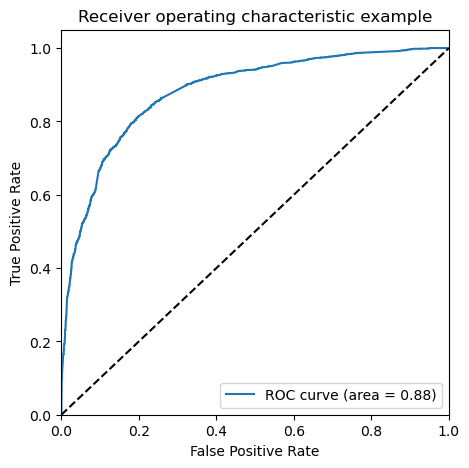

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'], drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

## Finding optimal cutoff Point

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_prob'].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.200996,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.323496,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.338381,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.873042,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.809324,7987,1,1,1,1,1,1,1,1,1,1,0


     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.578964     0.973835     0.331626
0.2   0.2  0.742560     0.914963     0.634571
0.3   0.3  0.794993     0.846280     0.762868
0.4   0.4  0.810738     0.765331     0.839181
0.5   0.5  0.815462     0.697056     0.889629
0.6   0.6  0.794678     0.589943     0.922919
0.7   0.7  0.780192     0.512674     0.947759
0.8   0.8  0.759251     0.418234     0.972855
0.9   0.9  0.705243     0.252657     0.988732


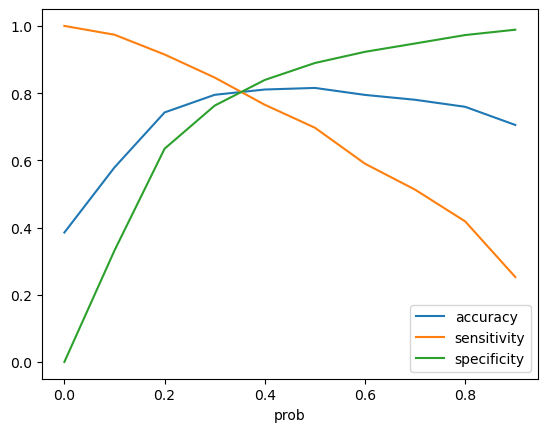

In [135]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [136]:
# Consider 0.35 as cutoff value
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_prob'].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.200996,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.323496,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.338381,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.873042,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.809324,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [137]:
# check the overall accuracy with optimal cut off value
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.8071169894504803

In [138]:
# Confusion Matrix
confusion_mat = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'] )
print(confusion_mat)

[[3159  746]
 [ 479 1967]]


In [139]:
# Checking all other Metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('*******TP*******')
print(TP)
print('*******TN********')
print(TN)
print('*******FP********')
print(FP)
print('*******FN********')
print(FN)

*******TP*******
1705
*******TN********
3474
*******FP********
431
*******FN********
741


In [140]:
Sensitivity = TP / float(TP+FN)
Specificity = (TN / float(TN+FP))
FP_Rate     = (FP/ float(TN+FP))
PP_Value    = (TP / float(TP+FP))
NP_Value    = (TN / float(TN+ FN))
Precision   = (TP / float(TP+FP))
Recall      = (TP / float(TP+FN))
F1_Score    = 2 * Precision * Recall/(Precision + Recall)

print('Sensitivity: ',Sensitivity )
print('Specificity: ',Specificity )
print('False Positive Rate: ', FP_Rate)
print('Positive Predictive Value: ', PP_Value)
print('Negative Predictive Value: ', NP_Value)
print('Precision: ',Precision)
print('Recall: ',Recall)
print('F1 Score is : ',F1_Score)


Sensitivity:  0.697056418642682
Specificity:  0.889628681177977
False Positive Rate:  0.11037131882202304
Positive Predictive Value:  0.7982209737827716
Negative Predictive Value:  0.8241992882562278
Precision:  0.7982209737827716
Recall:  0.697056418642682
F1 Score is :  0.7442164993452641


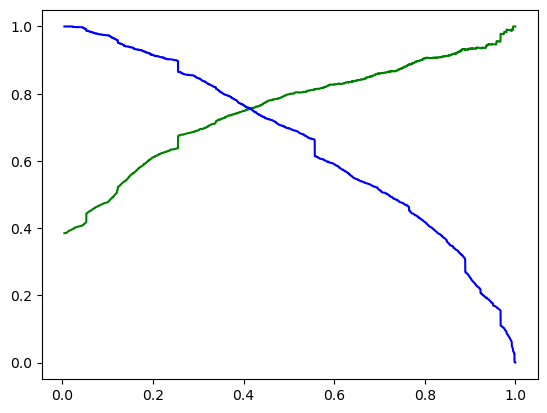

In [141]:
# Checking the Precision-Recall Tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

#### The optimum point is around 0.4. Thus we keep our previous cutoff of 0.37 as the final cutoff probability.

In [142]:
y_train_pred_final = y_train_pred_final[['Converted','Converted_prob','Lead Number','final_predicted']]
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,final_predicted
0,0,0.200996,3009,0
1,0,0.323496,1012,0
2,0,0.338381,9226,0
3,1,0.873042,4750,1
4,1,0.809324,7987,1


## Predictions on Test data set

In [143]:
# scale the test set with  transform 
cols = X_test.columns
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0.0,0.0,0.4,0.070530,0.666667,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1490,0.0,0.0,0.5,0.679695,0.833333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,0.0,0.0,0.2,0.033243,0.333333,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4216,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3830,0.0,0.0,0.8,0.073675,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
# Drop the columns from test dataset 
X_test.drop(['Page Views Per Visit',
              'Specialization_Others',
              'Lead Source_Facebook',
              'Last Notable Activity_Email Link Clicked',
              'Last Notable Activity_Email Opened',
              'Last Notable Activity_Resubscribed to emails',
              'Last Notable Activity_Unsubscribed',
              'Last Notable Activity_SMS Sent',
              'What is your current occupation_Unemployed',
              'City_Other Cities'],
               axis=1,inplace=True)
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Other_Source,...,Last Notable Activity_Email Bounced,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
3271,0.0,0.0,0.4,0.070530,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1490,0.0,0.0,0.5,0.679695,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,0.0,0.0,0.2,0.033243,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4216,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3830,0.0,0.0,0.8,0.073675,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Other_Source,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0.0,0.070530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1490,0.0,0.679695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7936,0.0,0.033243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4216,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3830,0.0,0.073675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# making prediction on the test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.133496
1490    0.974009
7936    0.115071
4216    0.765252
3830    0.135159
1800    0.665505
6507    0.348047
4821    0.310490
4223    0.967103
4714    0.338381
dtype: float64

In [147]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.133496
1490,0.974009
7936,0.115071
4216,0.765252
3830,0.135159


In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.133496
1,1,1490,0.974009
2,0,7936,0.115071
3,1,4216,0.765252
4,0,3830,0.135159


In [150]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [151]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob
0,0,3271,0.133496
1,1,1490,0.974009
2,0,7936,0.115071
3,1,4216,0.765252
4,0,3830,0.135159


In [152]:
# consider 0.37 as cutoff which is derived in final step of Training
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,Converted,Lead Number,Converted_prob,final_predicted
0,0,3271,0.133496,0
1,1,1490,0.974009,1
2,0,7936,0.115071,0
3,1,4216,0.765252,1
4,0,3830,0.135159,0


In [153]:
# Check the overall accuracy.
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

0.8057289753947852

In [154]:
# Checking confusion matrix
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'] )
confusion_test

array([[1425,  309],
       [ 220,  769]])

In [155]:
# Final metrics from test dataset

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives
print('*******TP*******')
print(TP)
print('*******TN********')
print(TN)
print('*******FP********')
print(FP)
print('*******FN********')
print(FN)

*******TP*******
769
*******TN********
1425
*******FP********
309
*******FN********
220


In [156]:
# Other metrics

Sensitivity = TP / float(TP+FN)
Specificity = (TN / float(TN+FP))
FP_Rate     = (FP/ float(TN+FP))
PP_Value    = (TP / float(TP+FP))
NP_Value    = (TN / float(TN+ FN))
Precision   = (TP / float(TP+FP))
Recall      = (TP / float(TP+FN))
F1_Score    = 2 * Precision * Recall/(Precision + Recall)

print('Sensitivity: ',Sensitivity )
print('Specificity: ',Specificity )
print('False Positive Rate: ', FP_Rate)
print('Positive Predictive Value: ', PP_Value)
print('Negative Predictive Value: ', NP_Value)
print('Precision: ',Precision)
print('Recall: ',Recall)
print('F1 Score is : ',F1_Score)

Sensitivity:  0.7775530839231547
Specificity:  0.8217993079584776
False Positive Rate:  0.1782006920415225
Positive Predictive Value:  0.7133580705009277
Negative Predictive Value:  0.8662613981762918
Precision:  0.7133580705009277
Recall:  0.7775530839231547
F1 Score is :  0.7440735365263667


## Assigning Lead score to Final Model

In [157]:
# Include lead score column
y_train_pred_final['Lead Score'] = y_train_pred_final['Converted_prob'] * 100

In [158]:
# Final model with scores
y_train_pred_final = y_train_pred_final[['Lead Number', 'Converted', 'Converted_prob', 'final_predicted','Lead Score']]
y_train_pred_final.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead Score
0,3009,0,0.200996,0,20.099645
1,1012,0,0.323496,0,32.349615
2,9226,0,0.338381,0,33.838145
3,4750,1,0.873042,1,87.304207
4,7987,1,0.809324,1,80.932386


In [159]:
# Assigning Lead Score to test dataset
y_pred_final['Lead Score'] = y_pred_final['Converted_prob'] * 100

In [160]:
y_test_pred_final = y_pred_final[['Lead Number', 'Converted', 'Converted_prob', 'final_predicted','Lead Score']]
y_test_pred_final.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead Score
0,3271,0,0.133496,0,13.349630
1,1490,1,0.974009,1,97.400934
2,7936,0,0.115071,0,11.507084
3,4216,1,0.765252,1,76.525215
4,3830,0,0.135159,0,13.515924


In [161]:
# Final Scores
final_df_lead_score = pd.concat([y_train_pred_final,y_test_pred_final],axis=0)
final_df_lead_score = final_df_lead_score.set_index('Lead Number')
final_df_lead_score.sort_index(inplace=True)
final_df_lead_score.head()

,Converted,Converted_prob,final_predicted,Lead Score
Lead Number,,,,
0,0,0.122338,0,12.233785
1,0,0.307002,0,30.700185
2,1,0.718837,1,71.883710
3,0,0.078182,0,7.818228
4,1,0.456847,1,45.684724


In [162]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [163]:
final_df = pd.merge(Lead_df, final_df_lead_score, how='inner', left_index=True, right_index=True)
final_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted_x,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted_y,Converted_prob,final_predicted,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,02.Medium,15.0,15.0,No,No,Modified,0,0.122338,0,12.233785
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,02.Medium,15.0,15.0,No,No,Email Opened,0,0.307002,0,30.700185
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,01.High,14.0,20.0,No,Yes,Email Opened,1,0.718837,1,71.883710
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,01.High,13.0,17.0,No,No,Modified,0,0.078182,0,7.818228
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,01.High,15.0,18.0,No,No,Modified,1,0.456847,1,45.684724


## Feature importance of Model

In [164]:
#Features and their co-efficient values
res.params

const                                                  -2.191140
Do Not Email                                           -1.658576
Total Time Spent on Website                             4.547666
Lead Origin_Lead Add Form                               3.152169
Lead Origin_Lead Import                                 1.449059
Lead Source_Other_Source                                1.119937
Last Activity_Olark Chat Conversation                  -0.915802
Last Activity_Other Activity                            2.218686
Last Activity_SMS Sent                                  1.299960
Last Activity_Unsubscribed                              1.308129
What is your current occupation_Working Professional    2.723800
Last Notable Activity_Modified                         -0.899272
Last Notable Activity_Unreachable                       1.567141
dtype: float64

In [165]:
# Ignore the constant from the params
Imp_features = res.params[1:]   
Imp_features = 100.0 * (Imp_features / Imp_features.max())

Imp_features.sort_values(ascending=False)

Total Time Spent on Website                             100.000000
Lead Origin_Lead Add Form                                69.313982
What is your current occupation_Working Professional     59.894445
Last Activity_Other Activity                             48.787341
Last Notable Activity_Unreachable                        34.460333
Lead Origin_Lead Import                                  31.863784
Last Activity_Unsubscribed                               28.764837
Last Activity_SMS Sent                                   28.585208
Lead Source_Other_Source                                 24.626634
Last Notable Activity_Modified                          -19.774372
Last Activity_Olark Chat Conversation                   -20.137840
Do Not Email                                            -36.470927
dtype: float64

In [166]:
Top_3 = Imp_features.sort_values(ascending=False)[:3]
print(Top_3)

Total Time Spent on Website                             100.000000
Lead Origin_Lead Add Form                                69.313982
What is your current occupation_Working Professional     59.894445
dtype: float64


In [167]:
# Finding the Hot leads
Hot_leads = y_pred_final.loc[y_pred_final['Lead Score'] >= 90 ]
Hot_leads.head()

,Converted,Lead Number,Converted_prob,final_predicted,Lead Score
1,1,1490,0.974009,1,97.400934
8,1,4223,0.967103,1,96.710307
21,1,2461,0.967103,1,96.710307
23,1,5822,0.997773,1,99.777268
25,1,2684,0.997773,1,99.777268


In [168]:
Hot_leads.shape

(239, 5)

In [169]:
# There are around 239 leads which are consider Hot leads and Lead number of them are given below
print('The Lead numbers of customers who must be contacted are: ')
Hot_leads_numbers = Hot_leads["Lead Number"].values.reshape(-1)
Hot_leads_numbers

The Lead numbers of customers who must be contacted are: 


array([1490, 4223, 2461, 5822, 2684, 2010, 4062, 7696, 4543, 4830, 3542,
       7674, 8596, 6947,  446, 8372, 5805, 3758, 1561, 7174, 4461, 1436,
       7552, 3932, 1475, 5785, 1867, 2860, 7253, 4297, 5490, 4498, 5797,
       7653, 2018, 1663, 3288, 8959, 7521, 8282, 8213, 5292, 6913, 1481,
       3265, 3285, 8106, 7417, 4179, 8568, 6784, 6754, 2960, 3983, 8745,
       4717, 8509, 6094, 7036, 2680,  112, 7175, 1675, 6999, 5826, 8492,
       6499, 2481, 3439, 4612, 4793, 2495, 2378, 7699, 5638, 2342, 8077,
       2727,  941, 2961, 1542, 5656, 8205, 6332, 8461, 5135,  174, 2674,
       8065, 1568, 8597, 4708, 6538, 5700, 5815, 7902, 5804, 4081,   64,
        170, 2650, 5808, 4578, 4803, 1470, 2473, 2584, 3727, 2118, 1200,
       2575, 4613, 4909, 8204, 4772, 8888, 8082, 4862, 8942, 1899, 3463,
       7893, 3248, 1729, 8620, 1190, 2158, 3355, 5353, 2994, 4559, 8521,
       4677, 7537, 1563, 4860, 9076, 2105, 1578, 6729, 1263, 2011, 6252,
       6760, 3015, 2285, 2598, 7018, 6290,  356, 85